# Simple Linear Regression

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
import numpy as np
%matplotlib inline

Import data

In [3]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv")

In [4]:
# lodd at first 5 rows of the df
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


## Explore the data

In [5]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


Select features

In [6]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


Plot a histogram of the extracted features

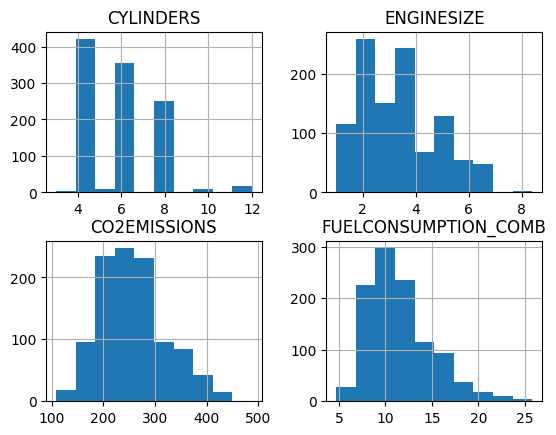

In [7]:
# for some reason the tutorial decided to assign a new variable with the same information but rearranged to visualize these data??
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

Check for linear relationship btwn fuel consumption and emissions

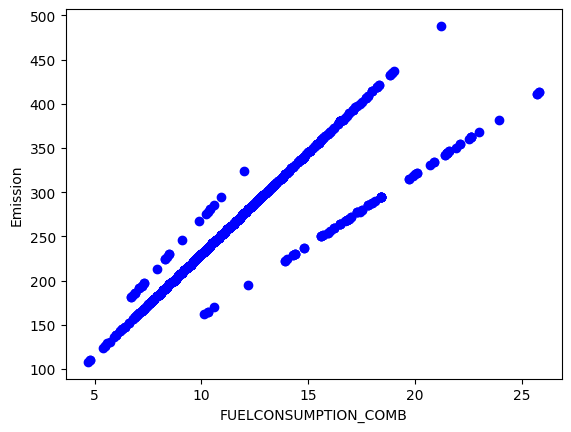

In [8]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

Check for linear relationship btwn engine size and emissions

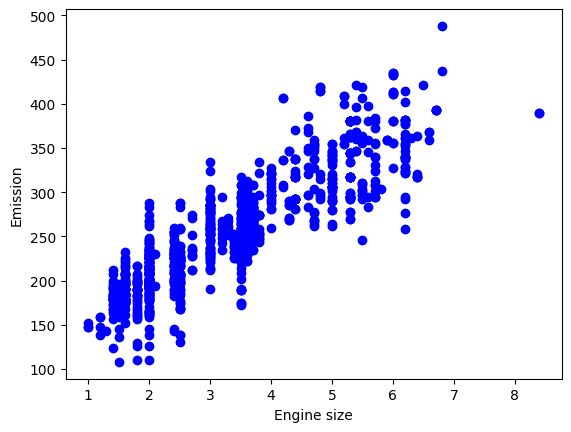

In [9]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

Check for linear relationship btwn engine size and emissions

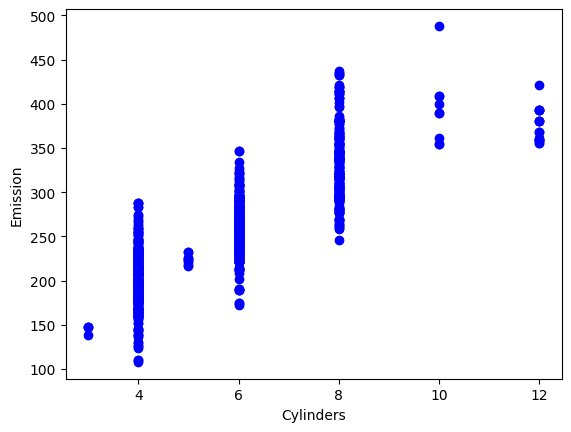

In [10]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Cylinders")
plt.ylabel("Emission")
plt.show()

**Creating train and test dataset**

Train/Test Split involves splitting the dataset into training and testing sets that are mutually exclusive. After which, you train with the training set and test with the testing set. This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the model. Therefore, it gives us a better understanding of how well our model generalizes on new data.

This means that we know the outcome of each data point in the testing dataset, making it great to test with! Since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing.

Let's split our dataset into train and test sets. 80% of the entire dataset will be used for training and 20% for testing. We create a mask to select random rows using np.random.rand() function:

Why not use `train_test_split` from sklearn?

In [11]:
#Generate an array of random numbers btwn 0&1 of the same length as rows in df and create a boolean mask where each element is True if the corresponding random number is less than 0.8 and False otherwise
msk = np.random.rand(len(df)) < 0.8
# select df rows where mask is True (about 80% of the data)
train = cdf[msk]
# select df rows where mask is False (~ negates the mask)
test = cdf[~msk]

### Simple Regression Model
Linear Regression fits a linear model with coefficients B = (B1, ..., Bn) to minimize the 'residual sum of squares' between the actual value y in the dataset, and the predicted value yhat using linear approximation. 

### Train data distribution

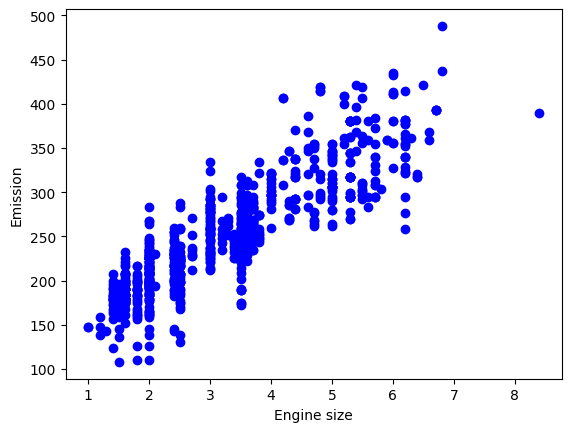

In [12]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

#### Modeling
Using sklearn package to model data.

In [13]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
#extract enginesize and make it an array
train_x = np.asanyarray(train[['ENGINESIZE']])
#extract co2emissions and make it an array
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[39.47811939]]
Intercept:  [123.95102274]


As mentioned before, __Coefficient__ and __Intercept__ in the simple linear regression, are the parameters of the fit line. 
Given that it is a simple linear regression, with only 2 parameters, and knowing that the parameters are the intercept and slope of the line, sklearn can estimate them directly from our data. 
Notice that all of the data must be available to traverse and calculate the parameters.

#### Plot outputs
We can plot the fit line over the data:

Notes about the code below:

`plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')`:
* `plt.plot()`: Draws a line plot.
* `train_x`: The x-axis values (same as the engine size from the train_x array).
* `regr.coef_[0][0]*train_x + regr.intercept_[0]`: This is the equation for the fitted linear regression line:
* `regr.coef_`: The slope (coefficient) of the regression line for ENGINESIZE. The [0][0] is used to access the value because `regr.coef_` is stored as a 2D array.
* `regr.intercept_`: The y-intercept of the regression line (also accessed with [0] since it's a 1D array).


equations for a straight line: y=mx+b, where m is the slope (`regr.coef_`) and b is the intercept (`regr.intercept_`).
`'-r'`: Specifies the line color as red (- indicates a solid line, and r stands for red).

**Plot**

Text(0, 0.5, 'Emission')

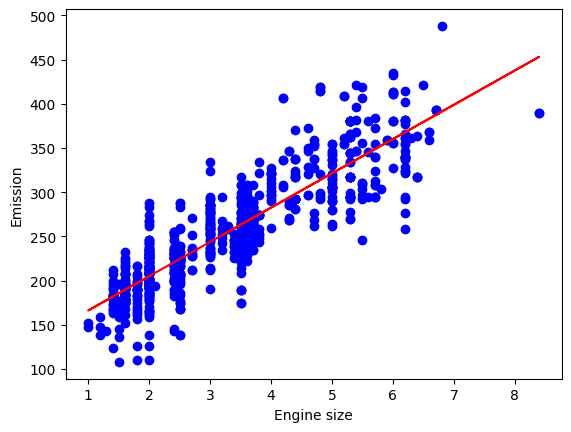

In [16]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

**Evaluation**

Different ways to evaluate a model:
* Mean Absolute Error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.

* Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean Absolute Error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.

* Root Mean Squared Error (RMSE). 

* R-squared is not an error, but rather a popular metric to measure the performance of your regression model. It represents how close the data points are to the fitted regression line. The higher the R-squared value, the better the model fits your data. The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

Use MSE

In [14]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
preds = regr.predict(test_x)

# %.2 = two decimial places, f = floating point number
print("Mean absolute error: %.2f" % np.mean(np.absolute(preds - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((preds - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , preds) )

Mean absolute error: 23.19
Residual sum of squares (MSE): 897.46
R2-score: 0.78


Train using the `FUELCONSUMPTION_COMB` feature

In [15]:
#select fuelconsumption_comb as the train_x data and the test_x data
train_x2 = np.asanyarray(train[['FUELCONSUMPTION_COMB']])
test_x2 = np.asanyarray(test[['FUELCONSUMPTION_COMB']])

Use new train_x2 and previous train_y to train the model

In [16]:
regr = linear_model.LinearRegression()
regr.fit(train_x2, train_y)

#find the coefficients
print ('Coefficients:', regr.coef_)
print ('Intercept:', regr.intercept_)

Coefficients: [[16.43814831]]
Intercept: [65.67238756]


Find the predictions

In [17]:
predictions = regr.predict(test_x2)

Find the MAE

In [19]:
print("MAE: %.2f" % np.mean(np.absolute(predictions - test_y)))

MAE: 21.32


MAE is slightly worse when the model is trained using enginesize than when using fuelconsumption_comb